In [1]:
!pwd
# !pip install cartopy

/home/incois/ROMS/Post_Process


In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import cftime

import numpy as np
# Temporary compatibility for older SciPy/Dask with new NumPy
if not hasattr(np, "float"):
    np.float = float
if not hasattr(np, "int"):
    np.int = int
if not hasattr(np, "bool"):
    np.bool = bool
if not hasattr(np, "typeDict"):
    np.typeDict = np.sctypeDict



### Model output of Temperature after post processing
ds1 = xr.open_dataset('/home/incois/ROMS/Post_Process/temp_model_output.nc')
ds1 = ds1.sel(depth=0.0)
temp=ds1['temp']
temp = temp.sel(
    lon=slice(35,105),
    lat=slice(-5,28)
)
temp_clim = temp.groupby('time.month').mean('time') # Monthly climatology of Temeprature

/home/incois/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/incois/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (
<ipython-input-2-550dfba428d7>:12: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "bool"):


In [3]:
temp_clim.shape # Model output - climatology

(12, 342, 701)

In [12]:
ds =xr.open_dataset('/home/incois/ROMS/Post_Process/temp_month.cdf',decode_times=False) #  World Ocean Atlas data of Temp
# ds=ds.sel(LEV=0.0)
ds=ds.sel(Z=0.0)
# print(ds)
temp_ob = ds['temperature']
temp_obs = temp_ob.sel(
    X=slice(35,105),
    Y=slice(-5,28)
)
# temp_obs

In [5]:
# Model has high resolution -- bring back to coarse resolution WOA data/observational grid
mod_clim_regd = []
mod_clim_regd = temp_clim.interp(
    lon=temp_obs.X,
    lat=temp_obs.Y,
    method='nearest'
)
mod_clim_regd.dims # model output after regridding

('month', 'Y', 'X')

In [6]:
# bring both model and observations to same dimensions and shape
# mod_clim_regd.shape 
temp_obs = temp_obs.rename({'T':'month'})
temp_obs = temp_obs.assign_coords(month=mod_clim_regd['month'].values)
temp_obs.dims

('month', 'Y', 'X')

In [7]:
model = mod_clim_regd  # model regriddied output
obs = temp_obs         # observations
# print(model.dims), print(obs.dims)

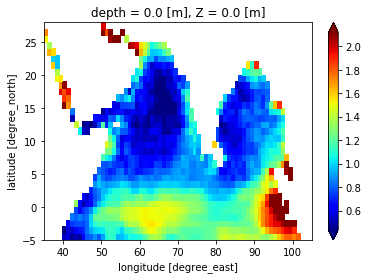

In [8]:
# RMSE between model and observations
rmse_map = np.sqrt(((model - obs) ** 2).mean(dim='month'))
rmse_map.plot(x='lon', y='lat', cmap='jet', robust=True)

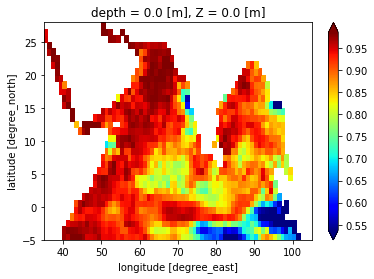

In [9]:
# Correlation between model and observations
corr = xr.corr(model, obs, dim=['month'])
# print("Overall correlation:", corr.values)
corr.plot(x='lon', y='lat', cmap='jet', robust=True)

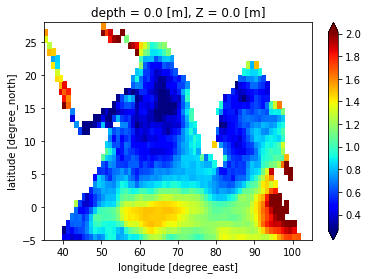

In [10]:
# Bias between model and observations
bias_spatial = (model - obs).mean(dim='month')
bias_spatial.plot(x='lon', y='lat', cmap='jet', robust=True)

In [ ]:
# pip install cartopy